In [1]:
%%HTML
    
<!-- reveal.js CSS theme and local overrides -->
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700&amp;lang=en"/>
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Merriweather:italic&amp;lang=en"/>
<link rel="stylesheet" href="stylefiles/presentation.css"/> 

<section id="title-slide"> 
    <br><br><br><h1><i>CROCKER Plots for Bifurcation Analysis</i></h1>
    <h3><i>Module 2-3</i></h3>
    <br><br>
    <h4><i>5/15/2023</i></h4>
    <br><br>
    <div class="uu_title_container">
        <smaller>
        <div>
            <b>Presented by:</b> Sunia Tanweer
            <br><br><br><br>
            <b>Topological Signal Processing for Dynamical Systems</b><br>
            SIAM-DS Minitutorial 2023
        </div>  
        </smaller>
    </div><br>
    <div class='footer'>
        Michigan State University
    </div>
</section>

## Goals of this module

- Define CROCKER plots
- Understand basic interpretation and connection to persistence diagrams
- See potential connections to analyzing parameterized families of dynamical systems

# Betti Curves

## Recall
 
The Betti number $\beta_p(K)$ is the dimension of the $p$-dimensional homology, $\dim(H_p(K))$
    
## The Betti Curve 

Given a filtration $K_0 \subseteq K_1 \subseteq \cdots K_n$
the Betti curve is a function 
    $$t \mapsto \left(\beta_i (K_{\lfloor t \rfloor})\right).$$
    
## Compute Betti Curve
Given a persistence diagram, the Betti curve is computed as the function $\beta: \mathbb{R} \rightarrow \mathbb{N}$ whose value on $s \in \mathbb{R}$ is the number of points $(b_i, d_i)$ in the diagram such that $b_i \leq s < d_i$.


# Example

In [2]:
# Import libraries
from teaspoon.MakeData.PointCloud import Torus, Annulus, Circle
from teaspoon.TDA.Persistence import BettiCurve
from teaspoon.TDA.Persistence import CROCKER
import matplotlib.pyplot as plt
import numpy as np
from ripser import ripser

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
# Define function to draw point cloud, persistence diagram and Betti Curve
def DrawFigures(A, Dgm, epsilon, betti):
    
    # Create subplots
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (18,6))

    # Point Cloud
    ax1.scatter(*A.T)
    ax1.set_title('Point Cloud')

    # Persistence Dgm
    ax2.scatter(Dgm[:, 0], Dgm[:, 1])
    ax2.plot([0, Dgm.max() + 0.1], [0, Dgm.max() + 0.1], '--k')
    ax2.axis('equal')
    ax2.set_title('Persistence Diagram')

    # Betti Curve
    ax3.step(epsilon, betti)
    ax3.set_title('Betti Curve')

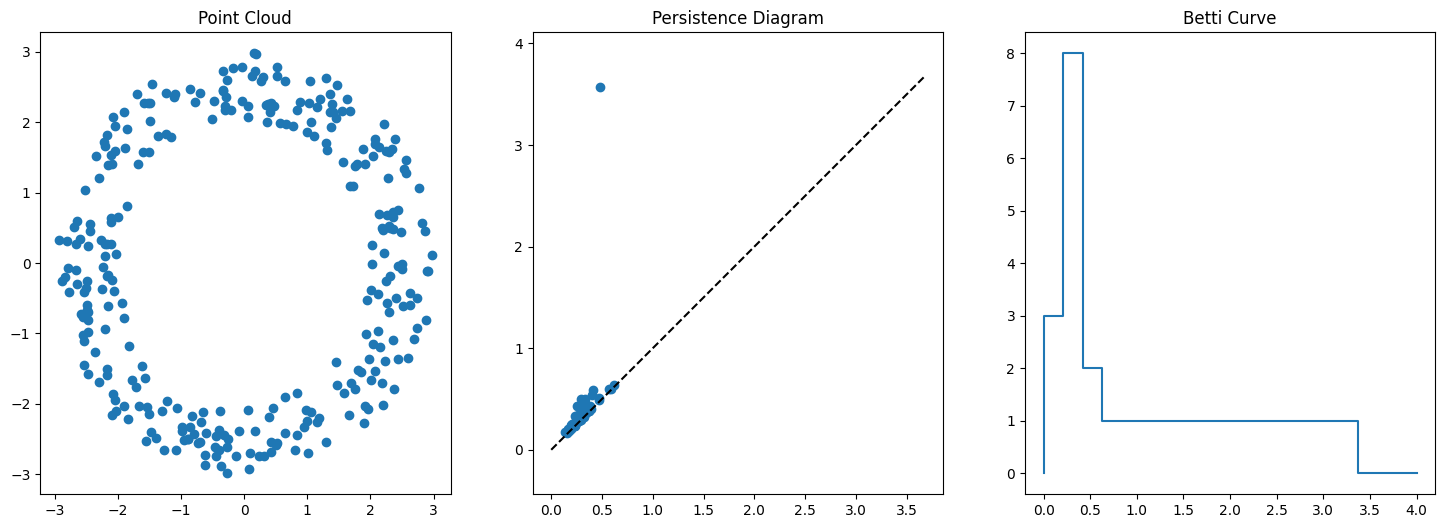

In [4]:
# An annulus
A = Annulus(N = 300, r = 2, R = 3)
Dgm = ripser(A,2)['dgms'][1]
t,x = BettiCurve(Dgm,4,20)

DrawFigures(A, Dgm, t, x)

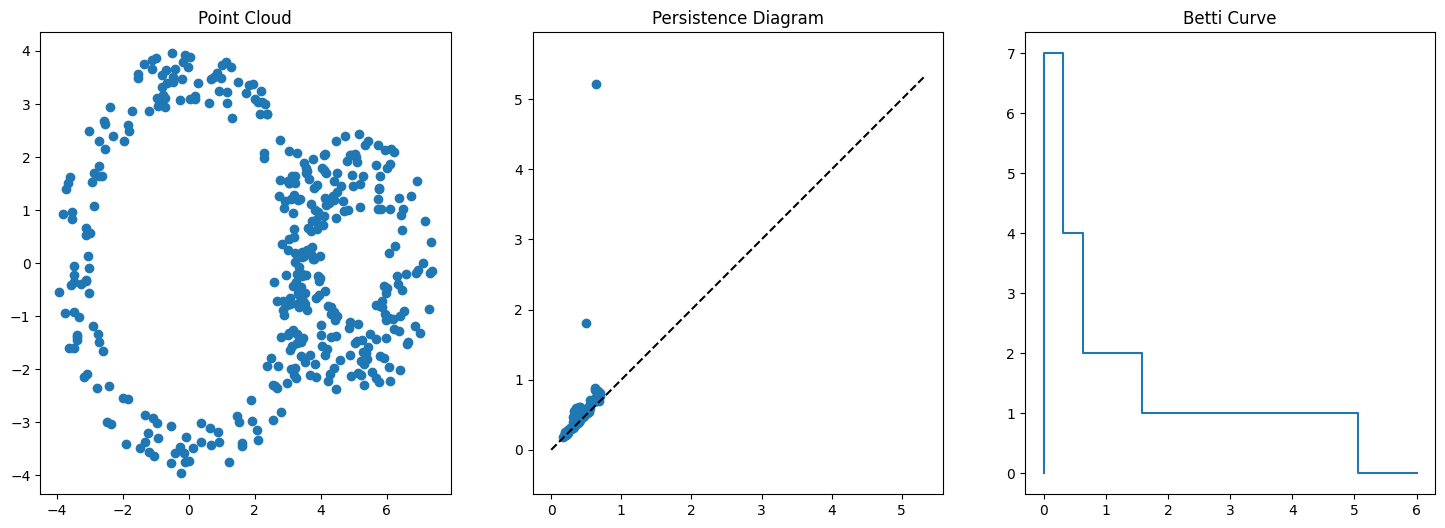

In [5]:
# Two annuluses
A1 = Annulus(N = 200, r = 3, R = 4)
A2 = Annulus(N = 200, r = 1, R = 2.5)
A2.T[0, :] = A2.T[0, :] + 5
A = np.concatenate((A1, A2), axis=0)

Dgm = ripser(A,2)['dgms'][1]
t,x = BettiCurve(Dgm, 6, 20)

DrawFigures(A, Dgm, t, x)

# CROCKER plots$ ^{[1]}$ 
#### (Contour Realization Of Computed k-dimensional hole Evolution in the Rips complex)


### Definition 

    
- Given a parameterized family of input filtered complexes $\{ K^t \mid t \in T\}$. 
- Fix thresholds for filtration parameter $\{ a_1 \leq a_2 \cdots \leq a_n\}$
- Plot the Betti curve for a fixed input filtered complex vertically, stack Betti curves horizontally. 

$ ^{[1]}$  C. M. Topaz, L. Ziegelmeier and T. Halverson. *Topological data analysis of biological aggregation models*, PloS One, 10 (2015), [DOI:10.1371/journal.pone.0126383](http://dx.doi.org/10.1371/journal.pone.0126383).

### Usage
    
- To summarize the evolution of persistence diagram for varying data
- The variation can be with respect to any system parameter
- Typicaly monitored against time or some bifurcation parameter


## Example

Let's take a annulus with fixed outer radius and changing inner radius. The inner radius is

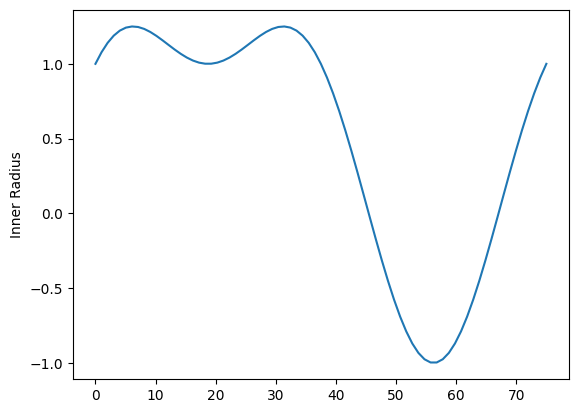

In [6]:
theta = np.linspace(0,2*np.pi,75)
rvec = np.sin(theta) + np.cos(theta)**2
plt.plot(np.linspace(0, 75, 75),rvec)
plt.ylabel('Inner Radius')
plt.show()

# TODO ADD A PICTURE OF AN EXAMPLE POINT CLOUD!!!

### CROCKER plot as the point cloud varies

<center><img src="figures/Crocker/Crocker_Torus.gif" width = 50% height = 'auto'></center>

# Lorenz System

Lorenz system can be represented by the following equations:
<br>
<center>$\dot{x} = \sigma (y-x) \quad \dot{y} = x(\rho - z)-y  \quad \dot{z} = xy - \beta z$</center>
<br>

We fix $\sigma = 10$ and $\beta = 8/3$, and the initial condition as $[x, y, z] = [10^{-10}, 0, 1]$, while $\rho \in [90, 105]$ acts as the bifurcation parameter.

<center><img src="figures/Crocker/Lorenz.png" width=50% height='auto'></center>

#### Bifurcation Diagram and CROCKER Plots

<center><img src="figures/Crocker/Lorenz1.png" width=65% height='auto'></center>

##### Conclusion 1: CROCKER Plots can be qualitatively compared to Bifurcation Diagrams

#### Bifurcation Diagram, LLE and $L_1$ norm of Betti Vectors

<center><img src="figures/Crocker/Lorenz2.png" width=45% height='auto'></center>

##### Conclusion 2: $L_1$ norm of Betti vectors can be qualitatively compared to LLE and used as an alternative

#### Bifurcation Diagram, LLE and CROCKERS
<center><img src="figures/Crocker/Lorenz3.png" width=75% height='auto'></center>

##### Conclusion 3: CROCKER Plots give information on the shape of the attractor

### Refer to the paper for more details and results from other systems:

<center><img src="figures/Crocker/QR.png" width=15% height='auto'></center>

İsmail Güzel, Elizabeth Munch, and Firas A. Khasawneh. *Detecting bifurcations in dynamical systems with CROCKER plots*,  CHAOS, 2022. [DOI:10.1063/5.0102421](https://doi.org/10.1063/5.0102421)

# You try it 

<div class = 'row'>
<div class = 'column'>
    
- Open the [2-3-Wkst-CrockerPlots.ipynb](2-3-Wkst-CrockerPlots.ipynb) notebook and get started! 
- Answers are included but hidden.
- We will come back together in 5-10 minutes to start on the next module.
    
</div>
<div class = 'column'>

![](figures/2-3-wksht.png)
        
</div>
</div>